# **END TO END MACHINE LEARNING PROJECT**

> In this chapter, the case study is house price predictions from the California Housing dataset.

## **Take a Quick Look at the Data Structure**

In [52]:
# import the required libraries
import pandas as pd
import numpy as np

In [53]:
# load the dataset
lokasi_dataset = '/content/drive/MyDrive/Dataset/housing.csv'
housing = pd.read_csv(lokasi_dataset)
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [54]:
# look at the overview information of dataset
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [55]:
# count the missing values
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

> This dataset has 10 attributes with 9 numerical attributes and 1 categorical attribute ("ocean_proximity"). You have to understand first the detailed information of each attribute from the dataset documentation. Machine Learning model only accept numerical input.

In [56]:
# checking "ocean_proximity" values as categorical values
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [57]:
# showing the description statistics, only numerical attribute can show description statistics
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


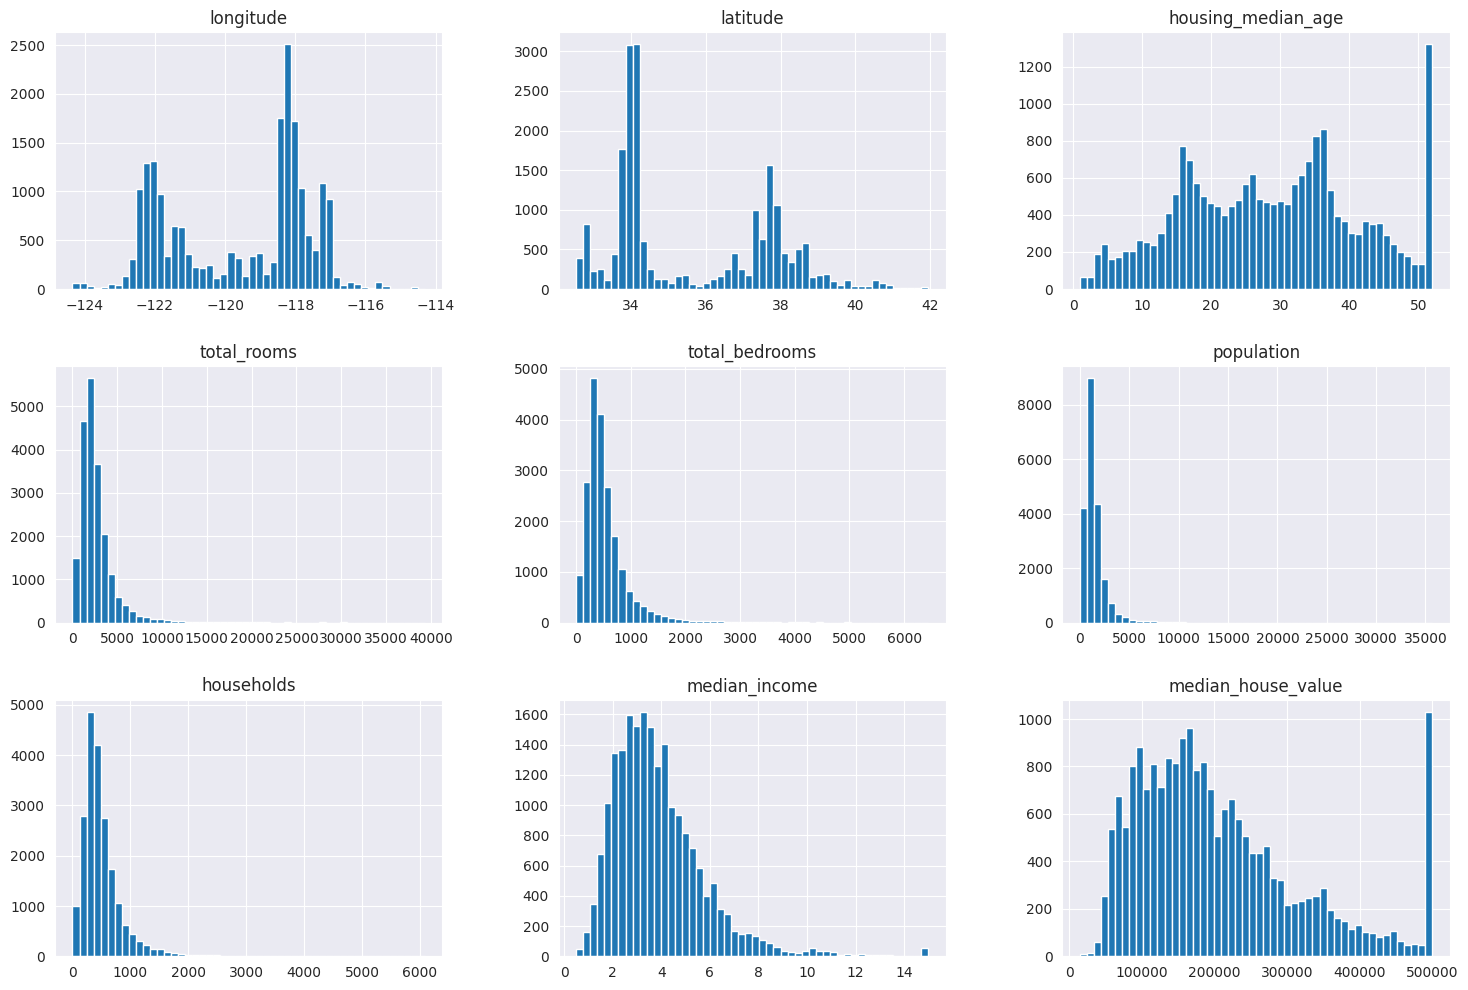

In [58]:
# showing the distribution of each attribute using histogram
# first, import matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

# showing histogram
housing.hist(bins=50, figsize=(18, 12))
plt.show()

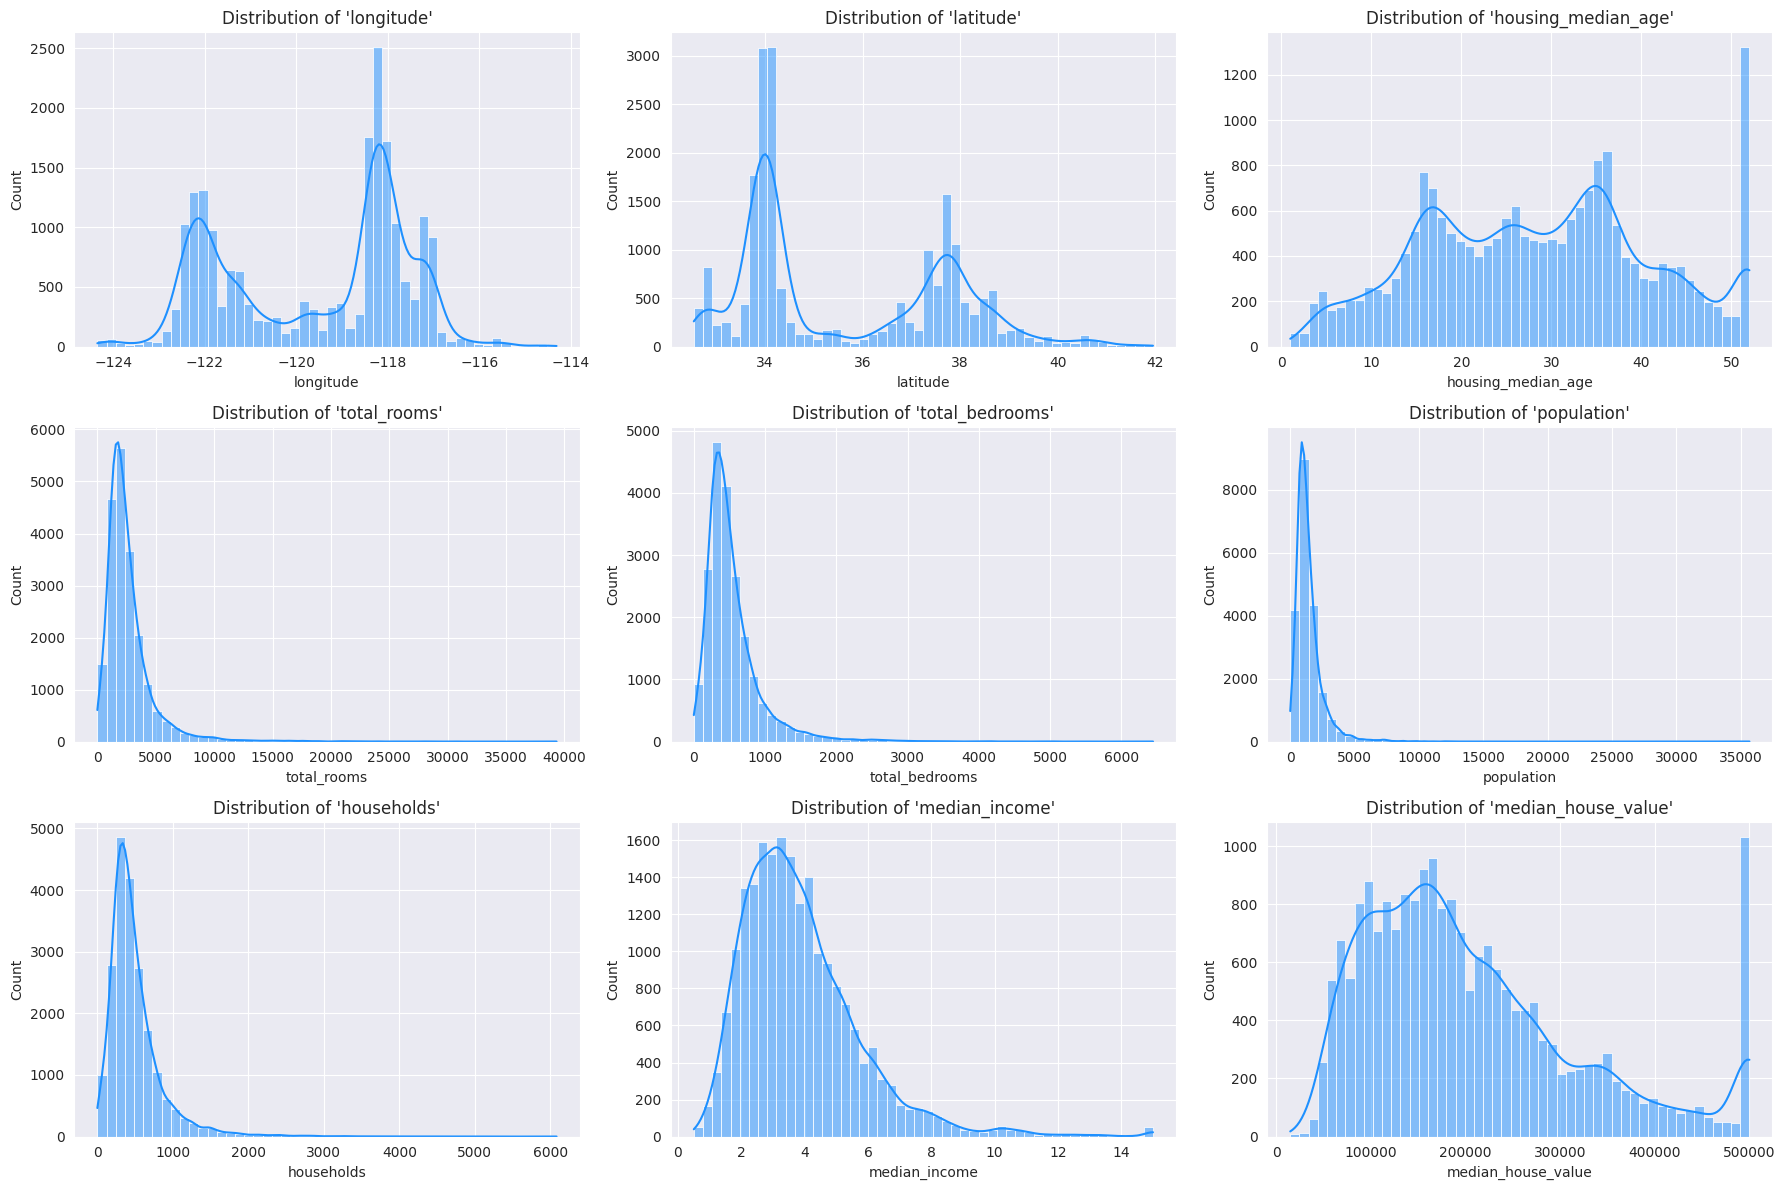

In [59]:
# alternative to show histogram of each attribute using seaborn

# setting figure size
plt.figure(figsize=(18, 12))

# define the header of dataset
header = housing.columns.tolist()

# making subplot, except 'ocean_proximity'
for i, col in enumerate(header[:9], 1):
  plt.subplot(3, 3, i)
  sns.histplot(x=housing[col], bins=50, kde=True, color='dodgerblue') # kde used to show normal distribution curve
  plt.title(f"Distribution of '{col}'")

# adjust the layout
plt.tight_layout()

# show the plot
plt.show()

## **Visualizing Geographical Data**

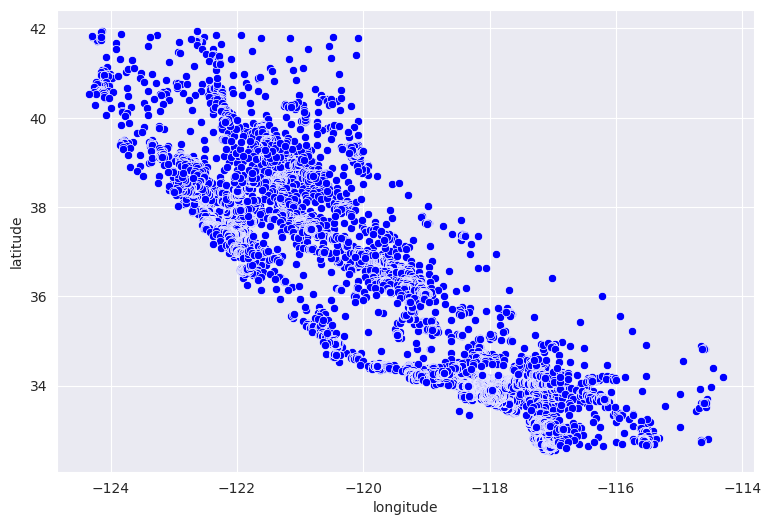

In [60]:
# simple visualization
plt.figure(figsize=(9,6))
sns.scatterplot(data=housing, x='longitude', y='latitude', color='blue')
plt.savefig("/content/drive/MyDrive/Dataset/textbook_handsonml_prjct/ch2_end-to-end_ml_prjct/bad_visualization_plot")
plt.show()

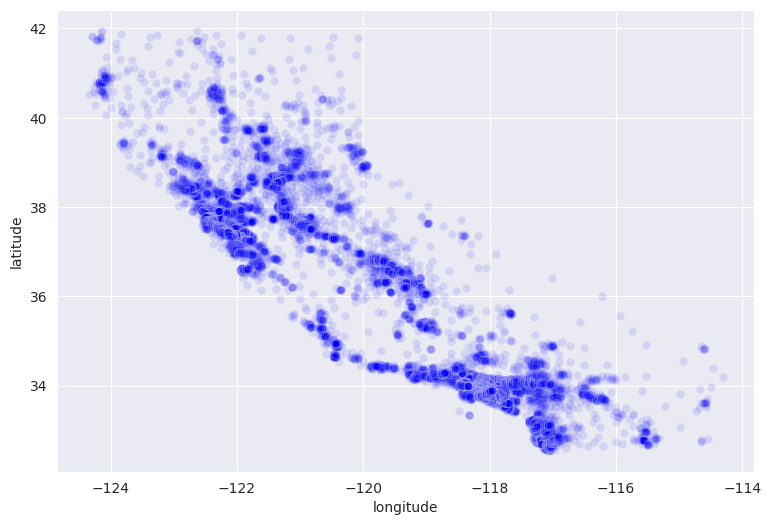

In [61]:
# better visualization
plt.figure(figsize=(9, 6))
sns.scatterplot(data=housing, x='longitude', y='latitude', color='blue', alpha=0.1)
plt.savefig('/content/drive/MyDrive/Dataset/textbook_handsonml_prjct/ch2_end-to-end_ml_prjct/better_visualization_plot')
plt.show()

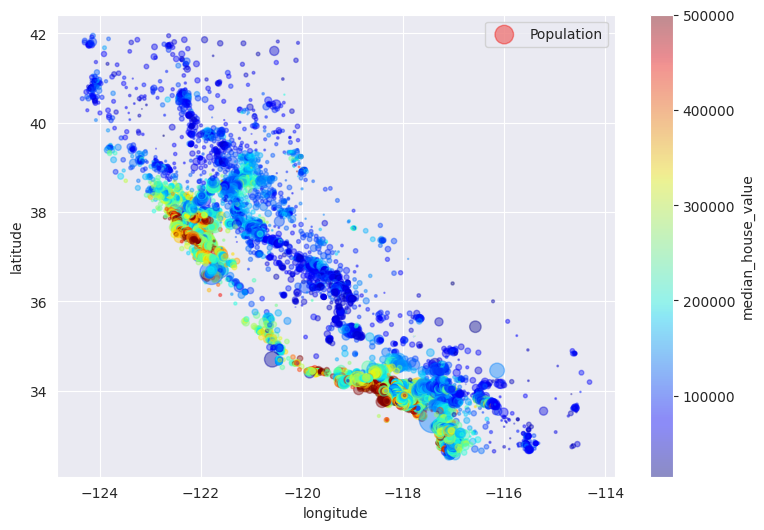

In [62]:
# detailed visualization
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4,
             s=housing['population']/100, label='Population', figsize=(9, 6),
             c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True,
             sharex=False)
plt.legend()
plt.savefig('/content/drive/MyDrive/Dataset/textbook_handsonml_prjct/ch2_end-to-end_ml_prjct/detailed_visualization_plot')
plt.show()

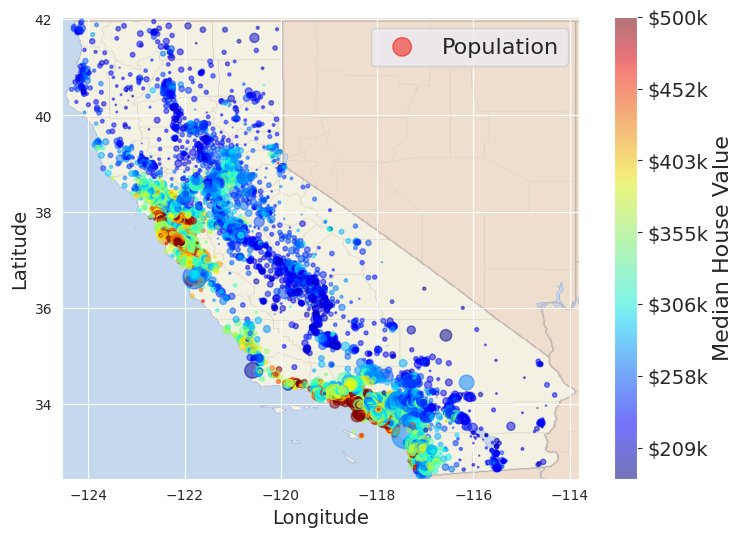

In [63]:
# detailed visualization with california map

# import matplotlib to read an image
import matplotlib.image as mpimg

# load a califonia map image
image_path = '/content/drive/MyDrive/Dataset/textbook_handsonml_prjct/ch2_end-to-end_ml_prjct/california.png'
california_img = mpimg.imread(image_path)

# create a complete plot
ax = housing.plot(kind='scatter', x='longitude', y='latitude', figsize=(9, 6),
                  s=housing['population']/100, label='Population',
                  c='median_house_value', cmap=plt.get_cmap('jet'),
                  colorbar=False, alpha=0.5)

# showing image
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap('jet'))

# giving axis label
plt.xlabel('Longitude', fontsize=14)
plt.ylabel('Latitude', fontsize=14)

# create color bar
prices = housing['median_house_value']
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar(ticks=tick_values/prices.max()) # determine range of color bar
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14) # giving prices label on color bar
cbar.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16)
plt.savefig('/content/drive/MyDrive/Dataset/textbook_handsonml_prjct/ch2_end-to-end_ml_prjct/detailed_visualization_with_map')
plt.show()

## **Looking for Correlation**

In [64]:
# correlation matrix
mat_corr = housing.corr()
mat_corr['median_house_value'].sort_values(ascending=False)

<ipython-input-64-8c9465996c90>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mat_corr = housing.corr()


median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

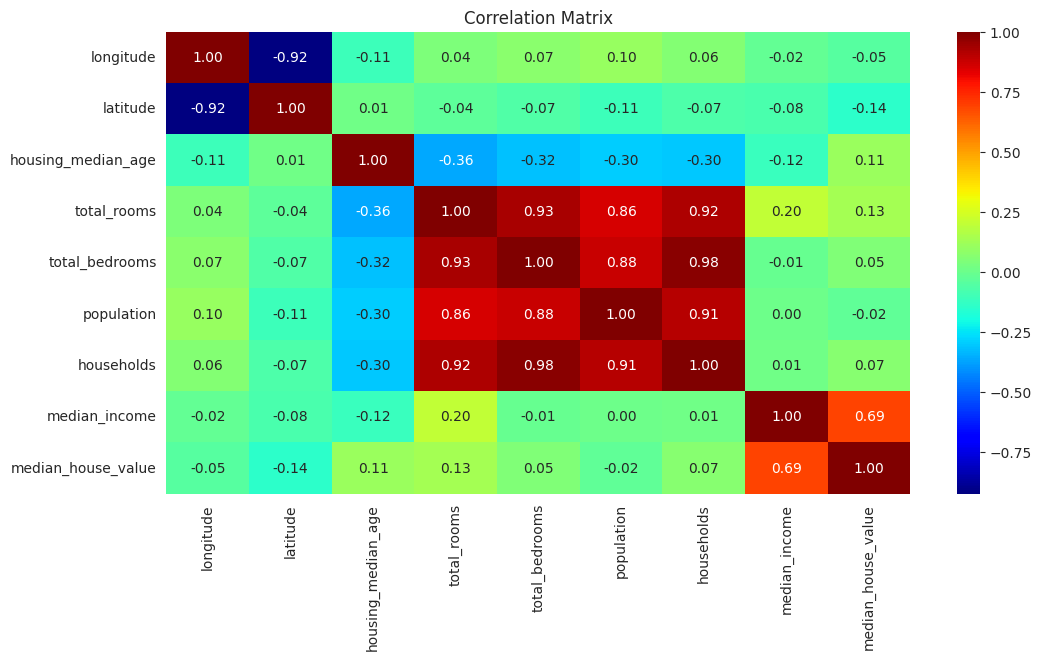

In [65]:
# looking correlation matrix with heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(mat_corr, annot=True, cmap='jet', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

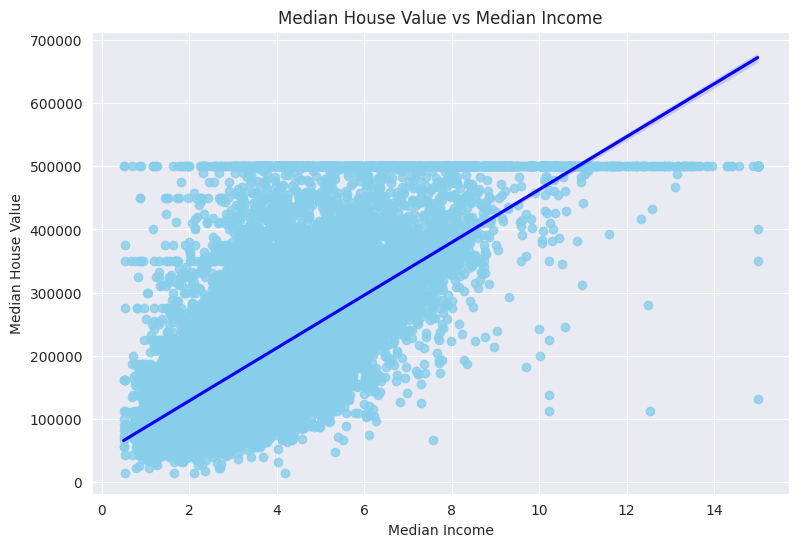

In [66]:
# looking correlation beetwen median income and median house value
plt.figure(figsize=(9, 6))
sns.regplot(data=housing, x='median_income', y='median_house_value',
            scatter_kws={'color': 'skyblue'}, line_kws={'color': 'blue'})
plt.title('Median House Value vs Median Income')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.show()

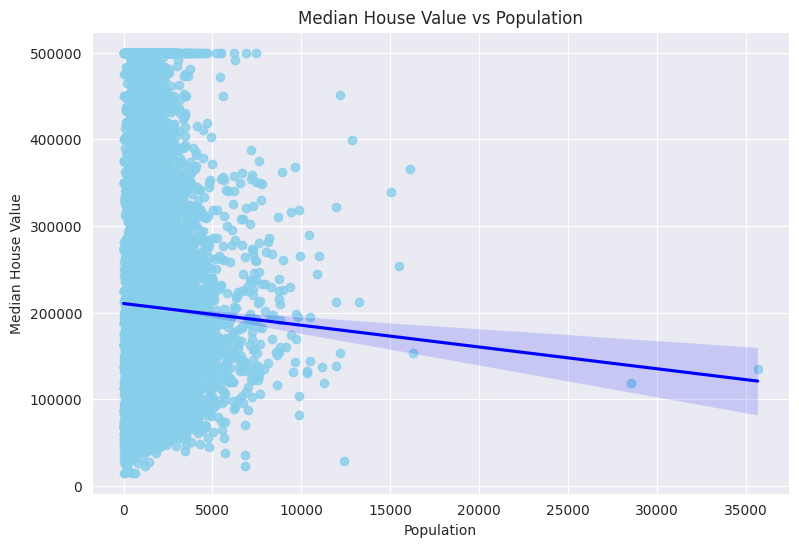

In [67]:
# looking correlation beetwen population and median house value
plt.figure(figsize=(9, 6))
sns.regplot(data=housing, x='population', y='median_house_value',
            scatter_kws={'color': 'skyblue'}, line_kws={'color': 'blue'})
plt.title('Median House Value vs Population')
plt.xlabel('Population')
plt.ylabel('Median House Value')
plt.show()

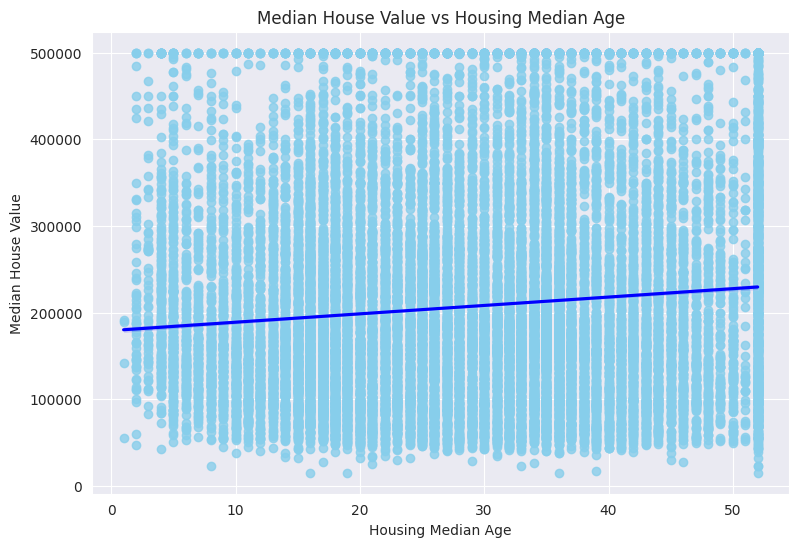

In [68]:
# looking correlation beetwen housing median age and median house value
plt.figure(figsize=(9, 6))
sns.regplot(data=housing, x='housing_median_age', y='median_house_value',
            scatter_kws={'color': 'skyblue'}, line_kws={'color': 'blue'})
plt.title('Median House Value vs Housing Median Age')
plt.xlabel('Housing Median Age')
plt.ylabel('Median House Value')
plt.show()

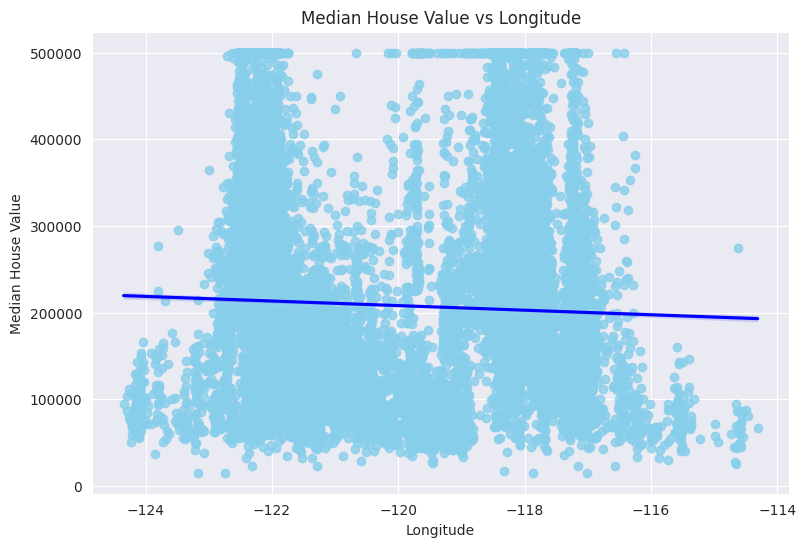

In [69]:
# looking correlation beetwen housing median age and longitude
plt.figure(figsize=(9, 6))
sns.regplot(data=housing, x='longitude', y='median_house_value',
            scatter_kws={'color': 'skyblue'}, line_kws={'color': 'blue'})
plt.title('Median House Value vs Longitude')
plt.xlabel('Longitude')
plt.ylabel('Median House Value')
plt.show()

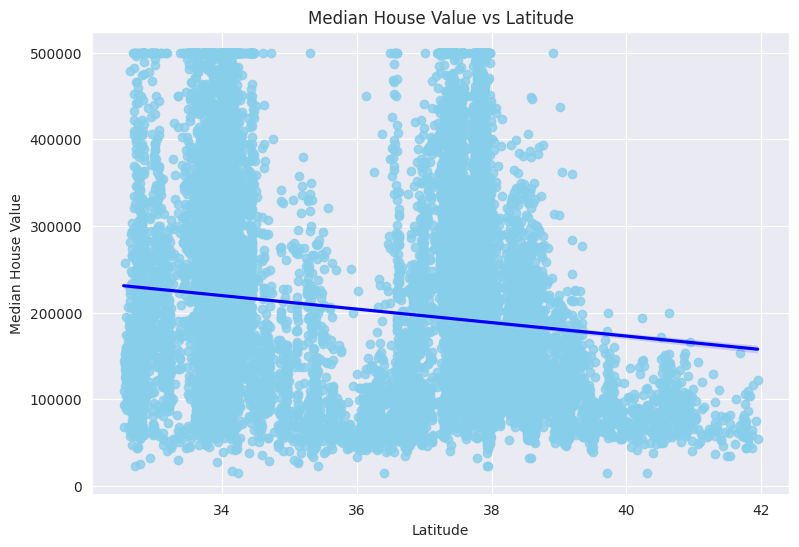

In [70]:
# looking correlation beetwen housing median age and latitude
plt.figure(figsize=(9, 6))
sns.regplot(data=housing, x='latitude', y='median_house_value',
            scatter_kws={'color': 'skyblue'}, line_kws={'color': 'blue'})
plt.title('Median House Value vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Median House Value')
plt.show()

## **Data Cleaning**

> Purpose of data cleaning is for handling missing values and handling categorical or text attributes.

### Handling missing values

In [71]:
# missing values is in total bedrooms column, fill the missing values with the median
# missing values usually is changed by mean or median
# define new variabel for dataset especialy for data cleaning
housing_clean = pd.read_csv('/content/drive/MyDrive/Dataset/housing.csv')
median = housing_clean['total_bedrooms'].median()
housing_clean['total_bedrooms'].fillna(median, inplace=True)

In [72]:
housing_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [73]:
housing_clean.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

### Handling categorical or text data

> Handling categorical or text data usually use ordinal encoder, one hot encoder, and label encoder. See the other referencies or literatures for understand it.

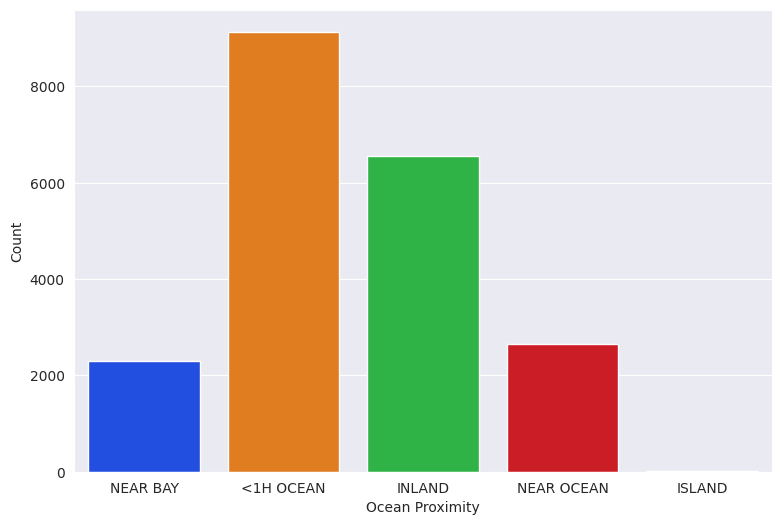

In [74]:
# in this case, categorical data is in 'ocean_proximity' column
plt.figure(figsize=(9, 6))
sns.countplot(data=housing_clean, x='ocean_proximity', palette='bright')
plt.xlabel('Ocean Proximity')
plt.ylabel('Count')
plt.show()

In [75]:
# import scikit learn pre processing one hot encoder
from sklearn.preprocessing import OneHotEncoder

housing_cat = housing_clean[['ocean_proximity']] # must be 2D array
onehot_encoder = OneHotEncoder()
housing_cat_1hot = onehot_encoder.fit_transform(housing_cat)

In [76]:
housing_cat_1hot.toarray()

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

## **Create a Test Set**

> Creating a test set is theoretically simple: pick some instances randomly, typically **20% of the dataset** (or less if your dataset is very large).

In [77]:
# import scikit learn library for split train and test data
from sklearn.model_selection import train_test_split

In [78]:
# define features and label
X = housing_clean.drop('median_house_value', axis=1) # features, remove median house value column
y = housing_clean['median_house_value'] # label or target, median house value column

In [79]:
# split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [80]:
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,NEAR OCEAN
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,NEAR OCEAN
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,NEAR OCEAN
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,NEAR OCEAN
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,INLAND
...,...,...,...,...,...,...,...,...,...
11284,-117.96,33.78,35.0,1330.0,201.0,658.0,217.0,6.3700,<1H OCEAN
11964,-117.43,34.02,33.0,3084.0,570.0,1753.0,449.0,3.0500,INLAND
5390,-118.38,34.03,36.0,2101.0,569.0,1756.0,527.0,2.9344,<1H OCEAN
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,<1H OCEAN


In [81]:
y_train

14196    103000.0
8267     382100.0
17445    172600.0
14265     93400.0
2271      96500.0
           ...   
11284    229200.0
11964     97800.0
5390     222100.0
860      283500.0
15795    325000.0
Name: median_house_value, Length: 16512, dtype: float64

## **Transformation Pipelines**

> There are two common ways to get all attributes to have the same scale: **min-max scaling** and **standardization**.

> As with all the transformations, it is important to fit the scalers to the training data only, not to the full dataset (including the test set). Only then can you use them to transform the training set and the test set (and new data).

> Data transformation is important to lighten the computation because the scale of each feature usually varies over a large range. With transformation, the data becomes more normally distributed so that it can improve the ML model performance.

> The ideal data is normally distributed.


In [82]:
# in this case using standard scaler
from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Create pipelines for scaling
standard_pipe = Pipeline([('std_scaler', StandardScaler())])

robust_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('rbst_scaler', RobustScaler())
])

# Select numerical columns excluding 'longitude', 'latitude', 'housing_median_age', and 'median_house_value'
rbst_num_attribs = housing_clean.select_dtypes(include=['number']).columns.difference(['longitude', 'latitude', 'housing_median_age', 'median_house_value'])
std_num_attribs = ['longitude', 'latitude', 'housing_median_age']
cat_attribs = ['ocean_proximity']

# Define the ColumnTransformer
transformer = ColumnTransformer([
    ('num_rbst_pipe', robust_pipe, rbst_num_attribs),
    ('num_std_pipe', standard_pipe, std_num_attribs),
    ('onehot', OneHotEncoder(), cat_attribs)], remainder='passthrough')

transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('num_rbst_pipe',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('rbst_scaler',
                                                  RobustScaler())]),
                                 Index(['households', 'median_income', 'population', 'total_bedrooms',
       'total_rooms'],
      dtype='object')),
                                ('num_std_pipe',
                                 Pipeline(steps=[('std_scaler',
                                                  StandardScaler())]),
                                 ['longitude', 'latitude',
                                  'housing_median_age']),
                                ('onehot', OneHotEncoder(),
                                 ['ocean_proximity'])])

In [83]:
# Fit the ColumnTransformer to your training data
transformer.fit(X_train)
X_train_transformed = transformer.transform(X_train)
X_test_transformed = transformer.transform(X_test)

# independent_scaler = StandardScaler()
# X_train = independent_scaler.fit_transform(X_train)
# X_test = independent_scaler.transform(X_test)

In [84]:
# show the results of transformation data train
X_train_transformed

array([[ 0.65337423, -0.12970915,  1.20917823, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.06134969,  0.12087153,  0.15688367, ...,  0.        ,
         0.        ,  1.        ],
       [-0.22699387,  0.27668566, -0.26894344, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.35889571, -0.27709355,  0.62860192, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.45705521,  0.98501003,  0.65101387, ...,  0.        ,
         0.        ,  0.        ],
       [ 2.55214724, -0.43975119,  1.54962647, ...,  0.        ,
         1.        ,  0.        ]])

## **Simple Transformation**

In [85]:
# review dataset which is cleaned
housing_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [86]:
housing_clean.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [87]:
housing_clean.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,536.838857,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,419.391878,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### One hot encoding

In [92]:
# one hot encoding library
from sklearn.preprocessing import OneHotEncoder

# Converting type of columns to category
# housing_clean['ocean_proximity'] = housing_clean['ocean_proximity'].astype('category')

# Assigning numerical values and storing it in another columns
# housing_clean['ocean_proximity'] = housing_clean['ocean_proximity'].cat.codes

# Create an instance of One-hot-encoder
# enc = OneHotEncoder()

# Passing encoded columns
# enc_data = pd.DataFrame(enc.fit_transform(housing_clean[['ocean_proximity']]).toarray())

# Merge with main dataset
# housing_encoded = housing_clean.join(enc_data)
# housing_encoded.drop(columns=['ocean_proximity'], inplace=True)

# housing_encoded

housing_clean['ocean_proximity'] = housing_clean['ocean_proximity'].astype(str)

encoder = OneHotEncoder()

encoded_data = encoder.fit_transform(housing_clean[['ocean_proximity']])

encoded_df = pd.DataFrame(encoded_data.toarray())

housing_encoded = pd.concat([housing_clean, encoded_df], axis=1)

housing_encoded.drop(columns=['ocean_proximity'], inplace=True)

housing_encoded

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,0,1,2,3,4
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0.0,1.0,0.0,0.0,0.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0.0,1.0,0.0,0.0,0.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0.0,1.0,0.0,0.0,0.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0.0,1.0,0.0,0.0,0.0


In [100]:
housing_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   0                   20640 non-null  float64
 10  1                   20640 non-null  float64
 11  2                   20640 non-null  float64
 12  3                   20640 non-null  float64
 13  4                   20640 non-null  float64
dtypes: float64(14)
memory usage: 2.2 MB


### Standard transformation

In [94]:
# standard scaler library
from sklearn.preprocessing import StandardScaler

In [103]:
# rename column name int to string
housing_encoded.rename(columns={0:"0",
                                1:"1",
                                2:"2",
                                3:"3",
                                4:"4"}, inplace=True)

In [104]:
housing_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   0                   20640 non-null  float64
 10  1                   20640 non-null  float64
 11  2                   20640 non-null  float64
 12  3                   20640 non-null  float64
 13  4                   20640 non-null  float64
dtypes: float64(14)
memory usage: 2.2 MB


In [105]:
# split dataset that already encoded
X = housing_encoded.drop('median_house_value', axis=1)
y = housing_encoded['median_house_value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [106]:
# standard transformation
std_scaler = StandardScaler()
X_train = std_scaler.fit_transform(X_train)
X_test = std_scaler.transform(X_test)

In [107]:
X_train

array([[ 1.27258656, -1.3728112 ,  0.34849025, ..., -0.01556621,
        -0.35564565,  2.62975816],
       [ 0.70916212, -0.87669601,  1.61811813, ..., -0.01556621,
        -0.35564565,  2.62975816],
       [-0.44760309, -0.46014647, -1.95271028, ..., -0.01556621,
        -0.35564565,  2.62975816],
       ...,
       [ 0.59946887, -0.75500738,  0.58654547, ..., -0.01556621,
        -0.35564565, -0.3802631 ],
       [-1.18553953,  0.90651045, -1.07984112, ..., -0.01556621,
        -0.35564565, -0.3802631 ],
       [-1.41489815,  0.99543676,  1.85617335, ..., -0.01556621,
         2.81178749, -0.3802631 ]])

In [108]:
X_test

array([[ 0.28534728,  0.1951    , -0.28632369, ..., -0.01556621,
        -0.35564565, -0.3802631 ],
       [ 0.06097472, -0.23549054,  0.11043502, ..., -0.01556621,
        -0.35564565, -0.3802631 ],
       [-1.42487026,  1.00947776,  1.85617335, ..., -0.01556621,
         2.81178749, -0.3802631 ],
       ...,
       [-1.23041404,  0.78014149, -0.28632369, ..., -0.01556621,
        -0.35564565, -0.3802631 ],
       [-0.08860699,  0.52740357,  0.58654547, ..., -0.01556621,
        -0.35564565, -0.3802631 ],
       [ 0.60445493, -0.66608108, -0.92113763, ..., -0.01556621,
        -0.35564565, -0.3802631 ]])

## **Select and Train Model with Cross Validation**

In [110]:
# import the required library for modeling ML
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import cross_val_score, KFold
from xgboost import XGBRegressor
from sklearn.svm import SVR

### Linear regression

In [116]:
# model initialization
linreg_model = LinearRegression()

# train the model
linreg_model.fit(X_train, y_train)

# predict data test
y_pred = linreg_model.predict(X_test)

# evaluation metrics
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

# show the result
print("Linear Regression Model:")
print("")
print(f'R-squared: {r2:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'MAE: {mae:.2f}')
print(f'MAPE: {mape*100:.2f}%')

Linear Regression Model:

R-squared: 0.63
RMSE: 70060.52
MAE: 50670.74
MAPE: 29.19%


### Random forest regression

In [127]:
# model initialization
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# train the model
rf_model.fit(X_train, y_train)

# predict data test
y_pred = rf_model.predict(X_test)

# evaluation metrics
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

# show the result
print("Random Forest Regressor Model:")
print("")
print(f'R-squared: {r2:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'MAE: {mae:.2f}')
print(f'MAPE: {mape*100:.2f}%')

Random Forest Regressor Model:

R-squared: 0.82
RMSE: 48941.95
MAE: 31628.59
MAPE: 17.74%


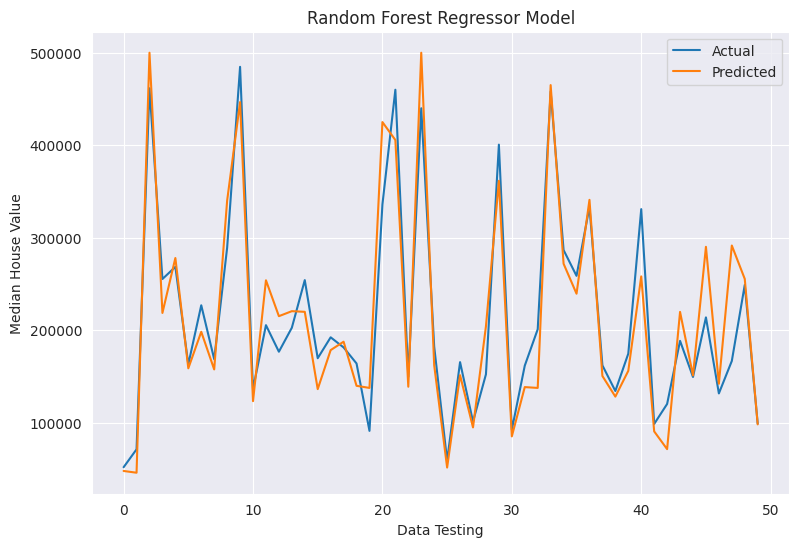

In [129]:
# visualization
compare = pd.DataFrame({'Predicted': y_pred,
                        'Actual': y_test})
plt.figure(figsize=(9, 6))
compare = compare.reset_index()
compare = compare.drop(['index'], axis=1)
plt.plot(compare[:50])
plt.ylabel('Median House Value')
plt.xlabel('Data Testing')
plt.legend(['Actual', 'Predicted'])
plt.title('Random Forest Regressor Model')
plt.show()

### XGB regressor

In [137]:
# model initialization
xgb_model = XGBRegressor(n_estimators=100, random_state=42)

# train the model
xgb_model.fit(X_train, y_train)

# predict data test
y_pred = xgb_model.predict(X_test)

# evaluation metrics
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

# show the result
print("XGB Regressor Model:")
print("")
print(f'R-squared: {r2:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'MAE: {mae:.2f}')
print(f'MAPE: {mape*100:.2f}%')

XGB Regressor Model:

R-squared: 0.83
RMSE: 47612.81
MAE: 31606.04
MAPE: 17.92%


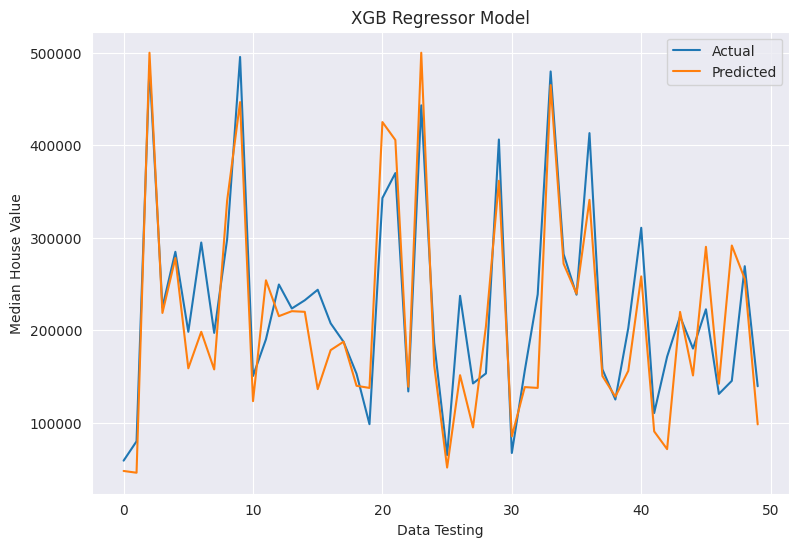

In [138]:
# visualization
compare = pd.DataFrame({'Predicted': y_pred,
                        'Actual': y_test})
plt.figure(figsize=(9, 6))
compare = compare.reset_index()
compare = compare.drop(['index'], axis=1)
plt.plot(compare[:50])
plt.ylabel('Median House Value')
plt.xlabel('Data Testing')
plt.legend(['Actual', 'Predicted'])
plt.title('XGB Regressor Model')
plt.show()

## **Conclusion**

> From the general experiment of three models including linear regression, random forest regression, and XGB regression, the best model is XGB regression with an R2 score of 0.83 and a MAPE of 17.92%.

> The performance of this model can be improved by optimizing the hyperparameters.